In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

/anaconda3/envs/dsi/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
pinole = pd.read_csv('./dataset/pinole150x100.csv')

In [6]:
pinole['label'].value_counts(normalize=True)

1    0.746269
0    0.253731
Name: label, dtype: float64

In [8]:
minority = pinole[pinole['label'] == 0]

In [21]:
num = min(pinole['label'].value_counts())
print(num)
duplicate = minority.sample(n=num*2, replace=True, random_state=42)
df_over = pd.concat([pinole, duplicate]) 

68


In [22]:
df_over['label'].value_counts()

0    204
1    200
Name: label, dtype: int64

In [23]:
X = df_over.iloc[:,14:45014]
y = df_over.iloc[:,45014]
X.shape, y.shape

((404, 45000), (404,))

In [24]:
num_obs = X.shape[0]
width = 100
height = 150

X_reshape = np.reshape(X.values, (num_obs, 100, 150, 3))
X_reshape = X_reshape.astype('float32')
X_reshape /= 255.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((282, 100, 150, 3), (122, 100, 150, 3), (282,), (122,))

In [28]:
model = Sequential()

model.add(Conv2D(filters = 64,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer 3

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 148, 64)       1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 146, 32)       18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 144, 16)       4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 72, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 54144)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54144)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3465280   
__________

Train on 282 samples, validate on 122 samples
Epoch 1/15
 - 31s - loss: 0.7547 - acc: 0.5532 - val_loss: 0.6054 - val_acc: 0.7623
Epoch 2/15
 - 29s - loss: 0.5575 - acc: 0.7376 - val_loss: 0.5568 - val_acc: 0.6803
Epoch 3/15
 - 31s - loss: 0.4355 - acc: 0.8085 - val_loss: 0.5393 - val_acc: 0.6721
Epoch 4/15
 - 31s - loss: 0.3232 - acc: 0.9007 - val_loss: 0.3550 - val_acc: 0.8197
Epoch 5/15
 - 29s - loss: 0.2193 - acc: 0.9149 - val_loss: 0.4074 - val_acc: 0.8033
Epoch 6/15
 - 27s - loss: 0.1377 - acc: 0.9645 - val_loss: 0.2962 - val_acc: 0.8852
Epoch 7/15
 - 27s - loss: 0.0484 - acc: 0.9929 - val_loss: 0.3540 - val_acc: 0.8770
Epoch 8/15
 - 27s - loss: 0.0162 - acc: 0.9965 - val_loss: 0.2619 - val_acc: 0.9098
Epoch 9/15
 - 30s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3130 - val_acc: 0.9016
Epoch 10/15
 - 28s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3541 - val_acc: 0.8934
Epoch 11/15
 - 29s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3170 - val_acc: 0.9016
Epoch 12/15
 - 28s - loss: 9

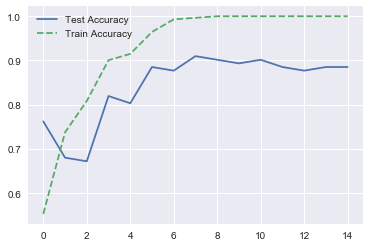

In [29]:
results = model.fit(X_train,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();

In [31]:
model = Sequential()

model.add(Conv2D(filters = 64,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 8,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer 3

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 148, 64)       1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 146, 32)       18464     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 144, 16)       4624      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 92, 142, 8)        1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 71, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 26128)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 26128)             0         
__________

Train on 282 samples, validate on 122 samples
Epoch 1/15
 - 33s - loss: 0.7461 - acc: 0.5355 - val_loss: 0.6848 - val_acc: 0.5082
Epoch 2/15
 - 34s - loss: 0.6834 - acc: 0.5284 - val_loss: 0.6646 - val_acc: 0.5328
Epoch 3/15
 - 32s - loss: 0.5866 - acc: 0.7376 - val_loss: 0.5287 - val_acc: 0.7623
Epoch 4/15
 - 32s - loss: 0.4108 - acc: 0.8156 - val_loss: 0.4987 - val_acc: 0.7377
Epoch 5/15
 - 32s - loss: 0.3301 - acc: 0.8582 - val_loss: 0.3505 - val_acc: 0.8607
Epoch 6/15
 - 31s - loss: 0.2193 - acc: 0.9255 - val_loss: 0.3165 - val_acc: 0.8689
Epoch 7/15
 - 31s - loss: 0.1199 - acc: 0.9645 - val_loss: 0.2049 - val_acc: 0.9016
Epoch 8/15
 - 31s - loss: 0.0635 - acc: 0.9858 - val_loss: 0.3054 - val_acc: 0.9098
Epoch 9/15
 - 31s - loss: 0.0425 - acc: 0.9929 - val_loss: 0.2769 - val_acc: 0.8934
Epoch 10/15
 - 35s - loss: 0.0532 - acc: 0.9858 - val_loss: 0.4750 - val_acc: 0.8607
Epoch 11/15
 - 36s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.6303 - val_acc: 0.8361
Epoch 12/15
 - 38s - loss: 0

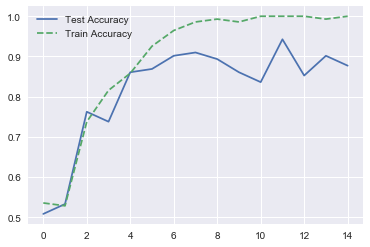

In [32]:
results = model.fit(X_train,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();

## oversampling on train

In [3]:
pinole['label'].value_counts(normalize=True)

1    0.746269
0    0.253731
Name: label, dtype: float64

In [4]:
X = pinole
y = pinole.iloc[:,45014]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((187, 45015), (81, 45015), (187,), (81,))

In [6]:
X_train['label'].value_counts()

1    140
0     47
Name: label, dtype: int64

In [7]:
minority = X_train[X_train['label'] == 0]
minority.shape

(47, 45015)

In [8]:
num = min(X_train['label'].value_counts())
print(num)
duplicate = minority.sample(n=num*2, replace=True, random_state=42)
X_over = pd.concat([X_train, duplicate])
X_over['label'].value_counts()

47


0    141
1    140
Name: label, dtype: int64

In [9]:
X_train = X_over.iloc[:,14:45014]
y_train = X_over.iloc[:,45014]
X_test = X_test.iloc[:,14:45014]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((281, 45000), (81, 45000), (281,), (81,))

In [13]:
width = 150
height = 100

num_train = X_train.shape[0]
X_train_reshape = np.reshape(X_train.values, (num_train, 150, 100, 3))
X_train_reshape = X_train_reshape.astype('float32')
X_train_reshape /= 255.

num_test = X_test.shape[0]
X_test_reshape = np.reshape(X_test.values, (num_test, 150, 100, 3))
X_test_reshape = X_test_reshape.astype('float32')
X_test_reshape /= 255.


In [32]:
model = Sequential()

model.add(Conv2D(filters = 64,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 8,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 4,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

#model.add(MaxPooling2D(pool_size=(2, 2))) 

"""
model.add(Conv2D(filters = 64,         
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,     
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer 3
"""

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 98, 64)       1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 146, 96, 32)       18464     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 144, 94, 16)       4624      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 142, 92, 8)        1160      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 140, 90, 4)        292       
_________________________________________________________________
dropout_11 (Dropout)         (None, 140, 90, 4)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50400)             0         
__________

Train on 281 samples, validate on 81 samples
Epoch 1/15
 - 35s - loss: 0.7272 - acc: 0.4555 - val_loss: 0.5877 - val_acc: 0.7407
Epoch 2/15
 - 33s - loss: 0.7271 - acc: 0.5302 - val_loss: 0.6837 - val_acc: 0.7531
Epoch 3/15
 - 33s - loss: 0.6849 - acc: 0.5587 - val_loss: 0.6569 - val_acc: 0.7407
Epoch 4/15
 - 34s - loss: 0.6673 - acc: 0.5623 - val_loss: 0.7079 - val_acc: 0.3333
Epoch 5/15
 - 33s - loss: 0.6191 - acc: 0.7580 - val_loss: 0.6597 - val_acc: 0.5926
Epoch 6/15
 - 33s - loss: 0.4744 - acc: 0.8577 - val_loss: 0.7027 - val_acc: 0.7531
Epoch 7/15
 - 32s - loss: 0.4857 - acc: 0.7402 - val_loss: 0.6149 - val_acc: 0.7531
Epoch 8/15
 - 31s - loss: 0.2592 - acc: 0.9253 - val_loss: 0.6413 - val_acc: 0.7531
Epoch 9/15
 - 33s - loss: 0.0894 - acc: 0.9715 - val_loss: 0.8716 - val_acc: 0.6790
Epoch 10/15
 - 31s - loss: 0.0241 - acc: 0.9929 - val_loss: 1.0863 - val_acc: 0.7901
Epoch 11/15
 - 30s - loss: 0.0022 - acc: 1.0000 - val_loss: 1.2915 - val_acc: 0.8025
Epoch 12/15
 - 30s - loss: 5.

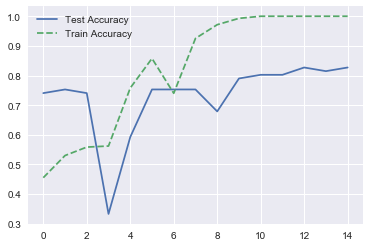

In [33]:
results = model.fit(X_train_reshape,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test_reshape, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();

In [34]:
confusion_matrix(y_test, model.predict_classes(X_test_reshape))

array([[10, 11],
       [ 3, 57]])

In [26]:
y_test.value_counts(normalize=True)

1    0.740741
0    0.259259
Name: label, dtype: float64

In [49]:
model = Sequential()

model.add(Conv2D(filters = 64,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 8,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 4,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

#model.add(MaxPooling2D(pool_size=(2, 2))) 

"""
model.add(Conv2D(filters = 64,         
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,     
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer 3
"""

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 148, 98, 64)       1792      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 146, 96, 32)       18464     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 144, 94, 16)       4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 72, 47, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 70, 45, 16)        2320      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 68, 43, 8)         1160      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 66, 41, 4)         292       
__________

Train on 281 samples, validate on 81 samples
Epoch 1/15
 - 40s - loss: 0.6937 - acc: 0.4982 - val_loss: 0.6892 - val_acc: 0.7037
Epoch 2/15
 - 38s - loss: 0.6930 - acc: 0.5160 - val_loss: 0.6824 - val_acc: 0.7407
Epoch 3/15
 - 31s - loss: 0.6922 - acc: 0.5302 - val_loss: 0.6957 - val_acc: 0.3210
Epoch 4/15
 - 32s - loss: 0.6738 - acc: 0.6441 - val_loss: 0.6541 - val_acc: 0.7778
Epoch 5/15
 - 31s - loss: 0.6133 - acc: 0.7260 - val_loss: 0.6453 - val_acc: 0.6420
Epoch 6/15
 - 31s - loss: 0.4791 - acc: 0.7580 - val_loss: 0.8780 - val_acc: 0.4815
Epoch 7/15
 - 32s - loss: 0.4081 - acc: 0.8292 - val_loss: 0.6752 - val_acc: 0.7407
Epoch 8/15
 - 31s - loss: 0.2792 - acc: 0.8932 - val_loss: 0.7654 - val_acc: 0.6543
Epoch 9/15
 - 31s - loss: 0.1759 - acc: 0.9395 - val_loss: 1.4424 - val_acc: 0.7654
Epoch 10/15
 - 31s - loss: 0.1139 - acc: 0.9431 - val_loss: 1.3412 - val_acc: 0.7654
Epoch 11/15
 - 30s - loss: 0.0758 - acc: 0.9715 - val_loss: 1.5906 - val_acc: 0.7778
Epoch 12/15
 - 32s - loss: 0.

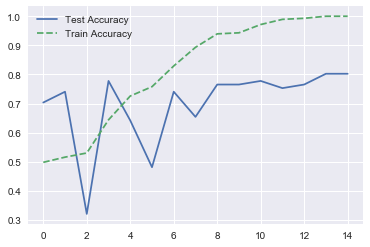

In [50]:
results = model.fit(X_train_reshape,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test_reshape, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();

In [59]:
model = Sequential()

model.add(Conv2D(filters = 96,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 64,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 32,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters = 16,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 8,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

model.add(Conv2D(filters = 4,  # convolutional layer 1       
                 kernel_size = 3,   
                 activation = 'relu',
                 input_shape = (width, height, 3) 
                ))

#model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 148, 98, 96)       2688      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 146, 96, 64)       55360     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 144, 94, 32)       18464     
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 142, 92, 16)       4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 71, 46, 16)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 69, 44, 16)        2320      
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 67, 42, 8)         1160      
__________

Train on 281 samples, validate on 81 samples
Epoch 1/15
 - 70s - loss: 0.7107 - acc: 0.5125 - val_loss: 0.6766 - val_acc: 0.7407
Epoch 2/15
 - 70s - loss: 0.6942 - acc: 0.4947 - val_loss: 0.7085 - val_acc: 0.2593
Epoch 3/15
 - 63s - loss: 0.6928 - acc: 0.5018 - val_loss: 0.6987 - val_acc: 0.2593
Epoch 4/15
 - 66s - loss: 0.6920 - acc: 0.5018 - val_loss: 0.7046 - val_acc: 0.2593
Epoch 5/15
 - 66s - loss: 0.6878 - acc: 0.5018 - val_loss: 0.7177 - val_acc: 0.2593
Epoch 6/15
 - 65s - loss: 0.6827 - acc: 0.5125 - val_loss: 0.7077 - val_acc: 0.2963
Epoch 7/15
 - 65s - loss: 0.6227 - acc: 0.5872 - val_loss: 0.8418 - val_acc: 0.4321
Epoch 8/15
 - 76s - loss: 0.4799 - acc: 0.8043 - val_loss: 0.8802 - val_acc: 0.5926
Epoch 9/15
 - 66s - loss: 0.2605 - acc: 0.8932 - val_loss: 1.6806 - val_acc: 0.5802
Epoch 10/15
 - 68s - loss: 0.1411 - acc: 0.9431 - val_loss: 1.6689 - val_acc: 0.6173
Epoch 11/15
 - 67s - loss: 0.0658 - acc: 0.9680 - val_loss: 2.3760 - val_acc: 0.5556
Epoch 12/15
 - 65s - loss: 0.

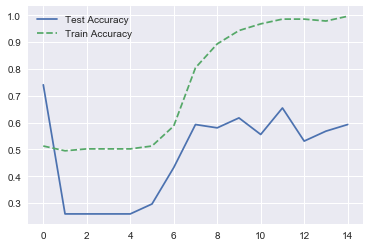

In [60]:
results = model.fit(X_train_reshape,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test_reshape, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();